# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from __future__ import print_function
import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

D:\Applications\Python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [2]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = './data/'
image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset

# Setting the random seed
np.random.seed(200)


# Split the data in three sets, 80% for training, 10% for validation and 10% for testing
# make sure that the image filenames have a fixed order before shuffling
# Add your code here

In [3]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

The function ```get_class_from_filename``` takes the file path and returns ***0*** for cats and ***1*** for dogs.

The function ```generate_class_arr``` takes the array of filenames and returns an array of class numbers using the function ```get_class_from_filename```.

In [4]:

def load_images(filenames):
    
    files = []
    for i in range(len(filenames)):
        files.append(cv2.imread(filenames[i]))
        
    return np.array(resize_files(files))


def resize_files(files):
    _files = []
    for i in range(len(files)):
        _resized = np.array(cv2.resize(files[i], (img_width, img_height),interpolation=cv2.INTER_AREA))
        _normalized = np.true_divide(_resized, 255)
        _files.append(_normalized)
        
    return _files


def get_class_from_filename(filename):
    
    parts = filename.split(".")
    size = len(parts)
    
    _class = parts[size - 3]
    _class = _class[-3:]
    
    return np.array([0, 1] if _class == "cat" else [1,0])


# print(get_class_from_filename("./test/dog.267.jpg"))

def generate_class_arr(filenames):
    
    classes = []
    
    for i in range(len(filenames)):
        classes.append(get_class_from_filename(filenames[i]))
    
    return np.array(classes)

# arr = ['./data/cat.2718.jpg', './data/dog.1753.jpg', './data/cat.1211.jpg', './data/dog.775.jpg', './data/cat.1577.jpg', './data/cat.952.jpg']
# print(generate_class_arr(arr))
        

In [5]:
y = generate_class_arr(image_filenames)

In [6]:

x_train_filenames, x_test_filenames, y_train, y_test = train_test_split(image_filenames, y, test_size=0.2)
x_test_filenames, x_val_filenames, y_test, y_val = train_test_split(x_test_filenames, y_test, test_size=0.5)


In [7]:
x_train = load_images(x_train_filenames)
x_test = load_images(x_test_filenames)
x_val = load_images(x_val_filenames)


In [8]:
# print(x_train_filenames[:5])
# print(y_train[:5])
print(len(x_train_filenames), " ", len(y_train))

# print(x_test_filenames[:5])
# print(y_test[:5])
print(len(x_test_filenames), " ", len(y_test))

# print(x_val_filenames[:5])
# print(y_val[:5])
print(len(x_val_filenames), " ", len(y_val))


4800   4800
600   600
600   600


Label: [1 0]
(50, 50, 3)


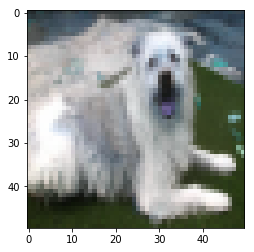

In [9]:

plt.imshow(x_train[0])
print("Label: {}".format(y_train[0]))
print(x_train[0].shape)


Label: [1 0]


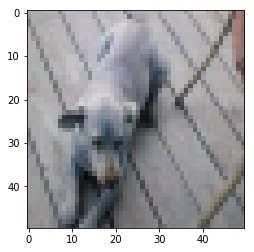

In [10]:

plt.imshow(x_test[0])
print("Label: {}".format(y_test[0]))


Label: [1 0]


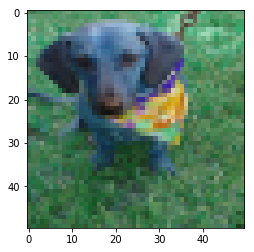

In [11]:

plt.imshow(x_val[0])
print("Label: {}".format(y_val[0]))


### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [13]:
# Add your code here


input_shape = x_train[1].shape

model = Sequential()
#add model layers

model.add(Conv2D(64, 2,padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, 2, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))
          

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       32896     
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
__________

In [15]:
batch_size = 128

In [16]:
epochs = 60

In [17]:
optimizer = keras.optimizers.RMSprop(lr=0.00005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
from keras.callbacks import ModelCheckpoint

weights_filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(weights_filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode='max')
callbacks_list = [checkpoint]


In [19]:

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test), callbacks=callbacks_list, verbose=1)


Train on 4800 samples, validate on 600 samples
Epoch 1/60
4800/4800 [==============================] - 9s 2ms/step - loss: 0.6903 - acc: 0.5271 - val_loss: 0.6740 - val_acc: 0.5967
Epoch 2/60
4800/4800 [==============================] - 1s 289us/step - loss: 0.6660 - acc: 0.6019 - val_loss: 0.6628 - val_acc: 0.5717
Epoch 3/60
4800/4800 [==============================] - 1s 279us/step - loss: 0.6443 - acc: 0.6398 - val_loss: 0.6364 - val_acc: 0.6650
Epoch 4/60
4800/4800 [==============================] - 1s 262us/step - loss: 0.6241 - acc: 0.6565 - val_loss: 0.6234 - val_acc: 0.6650
Epoch 5/60
4800/4800 [==============================] - 1s 266us/step - loss: 0.6119 - acc: 0.6696 - val_loss: 0.6475 - val_acc: 0.5817
Epoch 6/60
4800/4800 [==============================] - 1s 257us/step - loss: 0.6011 - acc: 0.6810 - val_loss: 0.6220 - val_acc: 0.6567
Epoch 7/60
4800/4800 [==============================] - 1s 276us/step - loss: 0.5853 - acc: 0.6969 - val_loss: 0.6031 - val_acc: 0.6900
Epo

4800/4800 [==============================] - 1s 271us/step - loss: 0.4217 - acc: 0.8052 - val_loss: 0.5465 - val_acc: 0.7183
Epoch 32/60
4800/4800 [==============================] - 1s 262us/step - loss: 0.4191 - acc: 0.8115 - val_loss: 0.5480 - val_acc: 0.7167
Epoch 33/60
4800/4800 [==============================] - 1s 260us/step - loss: 0.4062 - acc: 0.8206 - val_loss: 0.6478 - val_acc: 0.6850
Epoch 34/60
4800/4800 [==============================] - 1s 270us/step - loss: 0.4093 - acc: 0.8171 - val_loss: 0.5414 - val_acc: 0.7200
Epoch 35/60
4800/4800 [==============================] - 1s 272us/step - loss: 0.4015 - acc: 0.8217 - val_loss: 0.5376 - val_acc: 0.7350
Epoch 36/60
4800/4800 [==============================] - 1s 260us/step - loss: 0.3926 - acc: 0.8283 - val_loss: 0.5615 - val_acc: 0.7133
Epoch 37/60
4800/4800 [==============================] - 1s 257us/step - loss: 0.3847 - acc: 0.8333 - val_loss: 0.5250 - val_acc: 0.7217
Epoch 38/60
4800/4800 [==============================

In [20]:

score = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


600/600 [==============================] - 0s 230us/step
Test loss: 0.5162494762738545
Test accuracy: 0.7566666674613952


In [21]:

model_predictions = model.predict(x_val)


### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Add your code here
print("Classification report for the simple CNN:")
print(classification_report(y_val.argmax(axis=1), model_predictions.argmax(axis=1)))


Classification report for the simple CNN:
             precision    recall  f1-score   support

          0       0.74      0.79      0.77       303
          1       0.77      0.72      0.75       297

avg / total       0.76      0.76      0.76       600



In [23]:

print("Confusion matrix for the simple CNN:")
print(confusion_matrix(y_val.argmax(axis=1),  model_predictions.argmax(axis=1)))


Confusion matrix for the simple CNN:
[[239  64]
 [ 82 215]]


In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

def plot_precision_recall_curve(labels, predictions, classifier_name=None):
    
    title = "Precision-Recall curve"
    if classifier_name is not None:
        title = "Precision-Recall curve for {} predictions".format(classifier_name)
        
    precision, recall, thresholds = precision_recall_curve(labels, predictions)
    
    average_precision = average_precision_score(labels, predictions)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.suptitle('Precision-Recall curve for {0}: AP={1:0.2f}'.format(classifier_name, average_precision))
    
    plot = plt.subplot(1, 2, 2)
    
    plot.step(recall, precision, color='b', alpha=0.2, where='post')
    
    plot.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plot.set_xlabel('Recall')
    plot.set_ylabel('Precision')
    plot.set_ylim([0.0, 1.05])
    plot.set_xlim([0.0, 1.0])
       
    return plot


def plot_train_val_acc_curve(_hist):
    
    plt.plot(_hist.history['acc'])
    plt.plot(_hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    return plt.show()


def plot_train_val_loss_curve(_hist):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    return plt.show()


def plot_roc_curve(_y, _y_hat):
    
    fpr, tpr, thresholds = roc_curve(_y.argmax(axis=1).ravel(), first_arg(_y_hat))
    auc_simple = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_simple))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    
    return plt.show()
    

def first_arg(arr):
    
    _arr = []
    
    for i in range(len(arr)):
        _arr.append(arr[i][1])
    
    return _arr


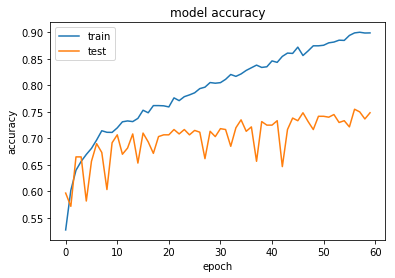

In [25]:

plot_train_val_acc_curve(history)


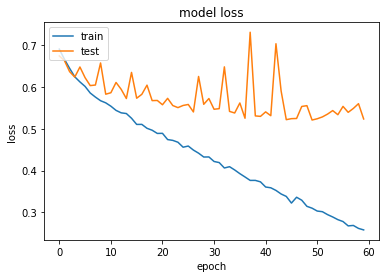

In [26]:

plot_train_val_loss_curve(history)


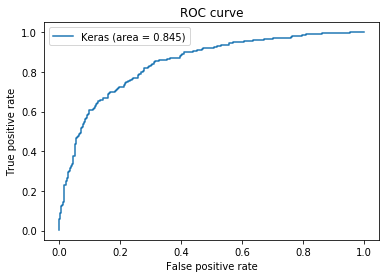

In [27]:

plot_roc_curve(y_val,  model_predictions)


Axes(0.547727,0.125;0.352273x0.755)


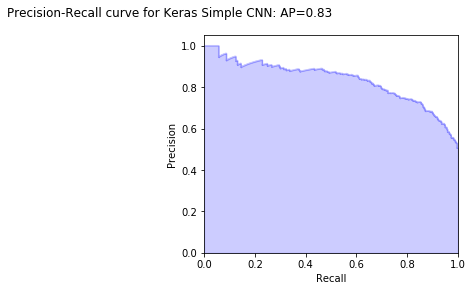

In [28]:

print(plot_precision_recall_curve(first_arg(y_val), first_arg(model_predictions), "Keras Simple CNN"))


### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [29]:
# Add your code here

input_shape = x_train[1].shape

model_complex = Sequential()
#add model layers

model_complex.add(Conv2D(128, 2,padding='same', input_shape=input_shape))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))
model_complex.add(Dropout(0.2))

model_complex.add(Conv2D(256, 2, padding='same'))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))
model_complex.add(Dropout(0.2))

model_complex.add(Conv2D(512, 2, padding='same'))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))
model_complex.add(Dropout(0.2))

model_complex.add(Conv2D(1024, 2, padding='same'))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))
model_complex.add(Dropout(0.2))

model_complex.add(Flatten())

model_complex.add(Dense(1024, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.2))

# model_complex.add(Dense(512, activation='relu'))
# model_complex.add(BatchNormalization())
# model_complex.add(Dropout(0.2))

# model_complex.add(Dense(512, activation='relu'))

model_complex.add(Dense(2, activation='softmax'))


In [30]:

model_complex.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 128)       1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 128)       512       
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 256)       131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 256)       1024      
__________

In [31]:

optimizer = keras.optimizers.RMSprop(lr=0.00005)
model_complex.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

weights_filepath = "weights_better.hdf5"
checkpoint = ModelCheckpoint(weights_filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode='max')
callbacks_list = [checkpoint]


In [32]:

# history_complex = model_complex.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test), verbose=1)

epoch_complex = 100

history_complex = model_complex.fit_generator(aug.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_test, y_test), callbacks=callbacks_list, steps_per_epoch=len(x_train) // batch_size, epochs=epoch_complex)


Epoch 1/100
37/37 [==============================] - 11s 291ms/step - loss: 0.9917 - acc: 0.5661 - val_loss: 0.6961 - val_acc: 0.5050
Epoch 2/100
37/37 [==============================] - 7s 195ms/step - loss: 0.8894 - acc: 0.5935 - val_loss: 0.7053 - val_acc: 0.5050
Epoch 3/100
22/37 [================>.............] - ETA: 2s - loss: 0.8751 - acc: 0.6016

KeyboardInterrupt: 

In [ ]:

score_complex = model_complex.evaluate(x_val, y_val, verbose=1)
print('Test loss:', score_complex[0])
print('Test accuracy:', score_complex[1])


In [ ]:

model_complex_predictions = model_complex.predict(x_val)


### Exercise 5

Apply the trained model on the testing set and output the classification results.

In [ ]:

print("Classification report for the complex CNN:")
print(classification_report(y_val.argmax(axis=1), model_complex_predictions.argmax(axis=1)))


In [ ]:

print("Confusion matrix for the complex CNN:")
print(confusion_matrix(y_val.argmax(axis=1), model_complex_predictions.argmax(axis=1)))


In [ ]:

plot_train_val_acc_curve(history_complex)


In [ ]:

plot_train_val_loss_curve(history_complex)


In [ ]:

print(plot_precision_recall_curve(first_arg(y_val), first_arg(model_complex_predictions), "Keras Complex CNN"))


### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [ ]:

# Add your code here
from keras import applications

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model_complex.layers])


In [ ]:

from keras import backend as K

input_img = x_val[0][0]

layer_name = 'conv2d_6'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])


In [ ]:

import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
